In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline

In [111]:
df = pd.read_csv("train.csv")

In [112]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [113]:
sex_mapping = {'male': 1, 'female': 0}
df['Sex'] = df['Sex'].map(sex_mapping)

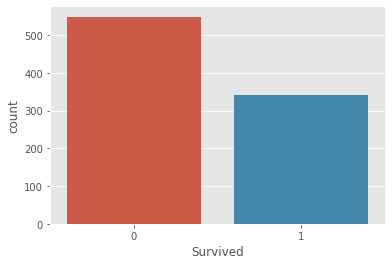

In [114]:
sns.countplot(df['Survived'])

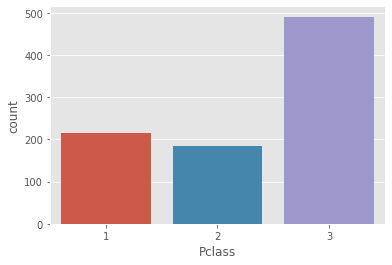

In [115]:
sns.countplot(df['Pclass']) #Number of passenger per class

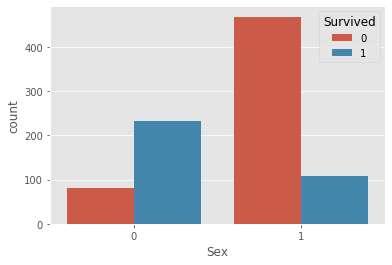

In [116]:
sns.countplot(x='Sex', hue='Survived', data=df)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [118]:
df.drop('Cabin', axis=1, inplace=True)

In [119]:
df.fillna(df.mean(), inplace=True)

In [120]:
embarked_mapping = {'S': 0, 'C' : 1, 'Q' : 2}
df['Embarked'] = df['Embarked'].map(embarked_mapping)

In [123]:
df['Embarked'].fillna(df['Embarked'].mean(), inplace=True)

Text(0.5, 0, 'Age')

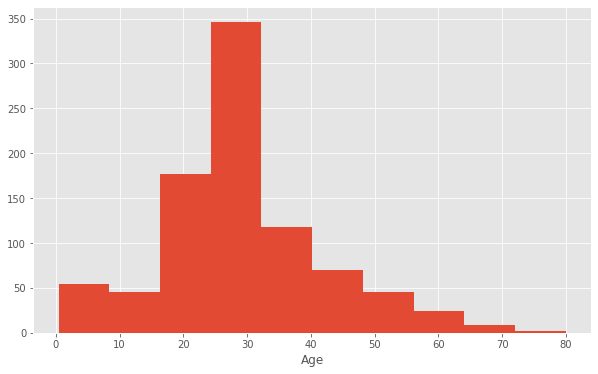

In [199]:
plt.figure(figsize=(10,6))
plt.hist(df['Age'], bins=10)
plt.xlabel('Age')

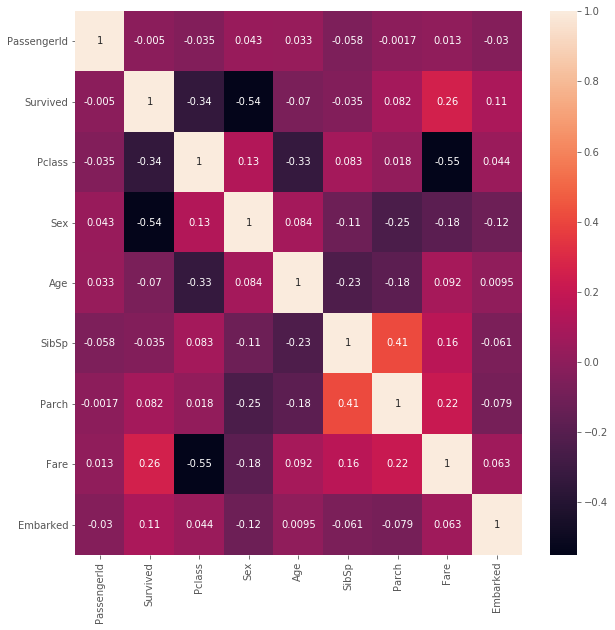

In [142]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [150]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df['Ticket'] = lb.fit_transform(df['Ticket'])
df.drop('Name', axis=1, inplace=True)

In [152]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [153]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
from sklearn.metrics import accuracy_score

In [165]:
predicted = lr.predict(X_test)
accuracy_score( y_test, predicted)

0.7937219730941704

In [168]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
accuracy_score(y_test, rfc_pred)

0.820627802690583

In [203]:
from sklearn.metrics import confusion_matrix

In [182]:
y_pred = cross_val_predict(rfc, X_test, y_test, cv=3)

In [208]:
conf_matrix = confusion_matrix(y_test, y_pred)

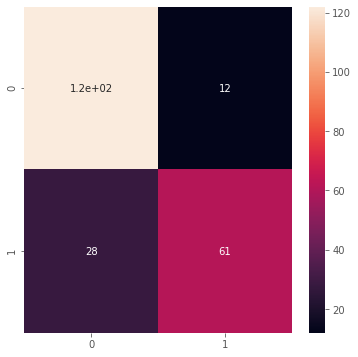

In [195]:
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True)